<a href="https://colab.research.google.com/github/kridtapon/Modern-Porfolio-Theory-For-50-Asset--Ray-dalio/blob/main/Modern_Porfolio_Theory_For_50_Asset_Ray_dalio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  52 of 52 completed
<ipython-input-4-1acbcc508e9e>:62: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Weights of the first portfolio:  [0.02859471 0.02916872 0.01761627 0.00103839 0.01767112 0.03484796
 0.01377985 0.01520163 0.02752835 0.02382056 0.00518557 0.00680842
 0.02216495 0.02969559 0.03257291 0.02157917 0.01596653 0.00830791
 0.02801379 0.03629413 0.00558385 0.00922834 0.02017877 0.02330453
 0.03090506 0.03236634 0.03559726 0.02846822 0.00632643 0.02250274
 0.02126299 0.03524621 0.01461137 0.03025478 0.00433583 0.00093994
 0.03352168 0.02119386 0.015567   0.00468144 0.01173017 0.00497728
 0.03440839 0.02498863 0.02886877 0.00195754 0.00164354 0.01366622
 0.02083889 0.00282645 0.01538961 0.02677138]


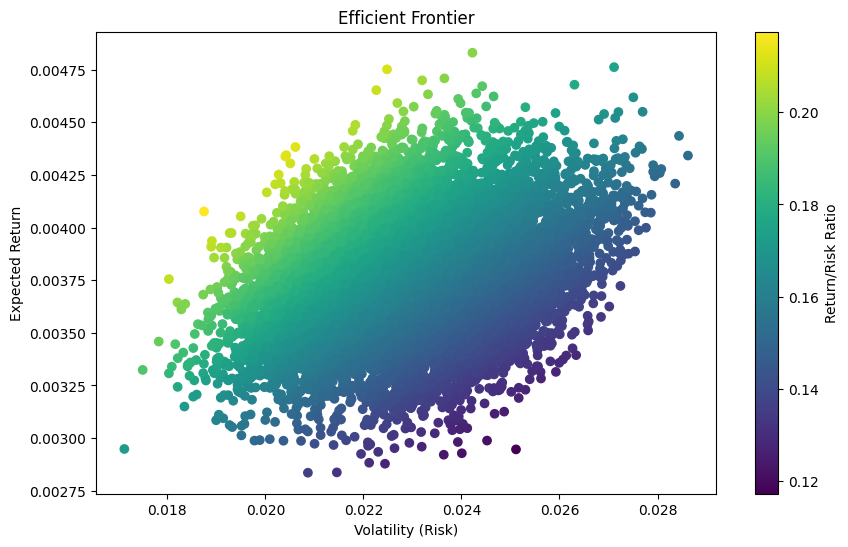

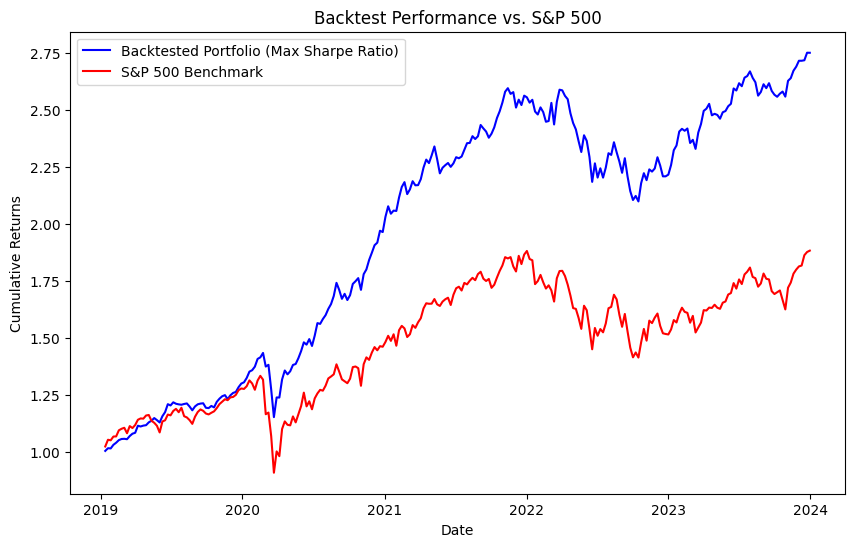

Performance of the Portfolio with Max Sharpe Ratio:
 - Annualized Return: 21.20%
 - Annualized Volatility: 13.52%

Performance of the S&P 500 Benchmark:
 - Annualized Return: 14.67%
 - Annualized Volatility: 19.89%


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Fetch Historical Data
assets = [
    "AAPL",     # Apple Stock
    "BTC-USD",  # Bitcoin
    "^SPX",     # S&P 500 Index
    "GC=F",     # Gold Futures
    "BND",      # Vanguard Total Bond Market ETF
    "VNQ",      # Vanguard Real Estate ETF
    "TSLA",     # Tesla Stock
    "MSFT",     # Microsoft Stock
    "AMZN",     # Amazon Stock
    "GOOGL",    # Alphabet Stock
    "ETH-USD",  # Ethereum
    "LTC-USD",  # Litecoin
    "^IXIC",    # Nasdaq Composite
    "SI=F",     # Silver Futures
    "CL=F",     # Crude Oil Futures
    "ZW=F",     # Wheat Futures
    "HG=F",     # Copper Futures
    "DX=F",     # US Dollar Index
    "^VIX",     # Volatility Index
    "^N225",    # Nikkei 225
    "^GDAXI",   # Germany's DAX Index
    "^FTSE",    # UK's FTSE 100
    "^STOXX50E", # European stocks
    "BABA",     # Alibaba Stock
    "NFLX",     # Netflix Stock
    "META",     # Meta (formerly Facebook)
    "INTC",     # Intel Stock
    "WMT",      # Walmart Stock
    "KO",       # Coca-Cola Stock
    "DIS",      # Disney Stock
    "NKE",      # Nike Stock
    "MCD",      # McDonald's Stock
    "PFE",      # Pfizer Stock
    "JNJ",      # J&J Stock
    "PG",       # P&G Stock
    "XOM",      # ExxonMobil Stock
    "CVX",      # Chevron Stock
    "PEP",      # PepsiCo Stock
    "SBUX",     # Starbucks Stock
    "MA",       # Mastercard Stock
    "V",        # Visa Stock
    "T",        # AT&T Stock
    "VZ",       # Verizon Stock
    "IBM",      # IBM Stock
    "BRK-B",    # Berkshire Hathaway Stock
    "LMT",      # Lockheed Martin Stock
    "GE",       # General Electric Stock
    "ORCL",     # Oracle Stock
    "ADBE",     # Adobe Stock
    "CRM",      # Salesforce Stock
    "SPOT",     # Spotify Stock
    "SQ"        # Square Stock
]
data = yf.download(assets,start = '2019-01-01',end='2024-01-01',period='1d')['Adj Close']
data = data.fillna(method='ffill')
df = data.copy()
# Resample the data to weekly frequency, using the last value of each week
df_weekly = df.resample('W').last()
df_ret = df_weekly.pct_change()
# Step 1: Calculate expected returns and the covariance matrix
mean_returns = df_ret.mean()  # Calculate average returns
cov_matrix = df_ret.cov()     # Calculate the covariance matrix
# Step 2: Simulate portfolios using MPT
num_portfolios = 10000  # Number of portfolios to simulate
results = np.zeros((3, num_portfolios))  # Store returns, volatility, and portfolio weights

weights_list = []  # List to store weights for each portfolio

for i in range(num_portfolios):
    # Randomly assign portfolio weights
    weights = np.random.random(len(df_ret.columns))
    weights /= np.sum(weights)  # Normalize the weights so they sum to 1

    # Portfolio return and risk (volatility)
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Save the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    weights_list.append(weights)  # Append the weights list for each portfolio

# Convert the results to a DataFrame
results_df = pd.DataFrame(results.T, columns=["Return", "Volatility", "Weights"])

# Optional: To view the weights of a specific portfolio (e.g., the first one)
print("Weights of the first portfolio: ", weights_list[0])
# Step 3: Plot Efficient Frontier
plt.figure(figsize=(10,6))
plt.scatter(results_df.Volatility, results_df.Return, c=results_df.Return / results_df.Volatility, cmap='viridis', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.colorbar(label='Return/Risk Ratio')
plt.show()

# Step 1: Calculate the returns based on the selected weights (from the efficient frontier)
# Here we use the portfolio with the highest Sharpe ratio (as an example)

# Assuming `weights_list` stores the portfolio weights and `results_df` contains the portfolio results
# Calculate the Sharpe ratio for each portfolio and select the one with the highest Sharpe ratio
sharpe_ratios = results_df['Return'] / results_df['Volatility']
max_sharpe_idx = sharpe_ratios.idxmax()  # Index of portfolio with max Sharpe ratio

# Extract the weights of the portfolio with the highest Sharpe ratio
max_sharpe_weights = weights_list[max_sharpe_idx]

# Step 2: Backtest this portfolio
# Calculate the portfolio returns using the selected weights
portfolio_returns = df_ret.dot(max_sharpe_weights)

# Step 3: Calculate cumulative returns for the backtest
cumulative_returns = (1 + portfolio_returns).cumprod()

# You can also compare it to a benchmark (e.g., S&P 500)
benchmark_returns = df_ret['^SPX']  # Example: using S&P 500 as benchmark
benchmark_cumulative = (1 + benchmark_returns).cumprod()

# Plot the benchmark vs. backtested portfolio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Backtested Portfolio (Max Sharpe Ratio)', color='b')
plt.plot(benchmark_cumulative, label='S&P 500 Benchmark', color='r')
plt.title('Backtest Performance vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Extract performance metrics of the best portfolio
best_portfolio_return = results_df.loc[max_sharpe_idx, 'Return']
best_portfolio_volatility = results_df.loc[max_sharpe_idx, 'Volatility']
best_portfolio_sharpe = sharpe_ratios[max_sharpe_idx]

# Calculate the S&P 500 metrics
sp500_return = df_ret['^SPX'].mean()
sp500_volatility = df_ret['^SPX'].std()
sp500_sharpe = sp500_return / sp500_volatility

# Print the results
print("Performance of the Portfolio with Max Sharpe Ratio:")
print(f" - Annualized Return: {best_portfolio_return * 52:.2%}")  # Convert to annualized
print(f" - Annualized Volatility: {best_portfolio_volatility * np.sqrt(52):.2%}")  # Convert to annualized

print("\nPerformance of the S&P 500 Benchmark:")
print(f" - Annualized Return: {sp500_return * 52:.2%}")  # Convert to annualized
print(f" - Annualized Volatility: {sp500_volatility * np.sqrt(52):.2%}")  # Convert to annualized